In [1]:
#IPython extension to reload modules before executing user code. If we make any change in function 
# and imoprting it we don't need to restart if we use auto reload 
%load_ext autoreload

# to print in between values as well without print
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn


# ML libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import LocalOutlierFactor
from sklearn import preprocessing

# DATA Pre Processing

1. Check for Data Types
2. Check Columns Names
3. Divide in train and test 
4. Check for Missing Values
5. Check for Bad Data
6. Imputation of Null values
7. Check for distribution type
8. Scaling the data
9. Checks for outliers 
10. Check for data Imbalance 
11. Perform necessary transformations
12. Perform feature Engineering
13. Binning Continuous data
14. Feature selection

basic preprocessing link - https://towardsdatascience.com/a-checklist-for-data-pre-processing-before-you-build-your-machine-learning-model-91d2d04dc53f 

In [3]:
# load database
data = pd.read_csv('xAPI-Edu-Data.csv')
data.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15.0,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20.0,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10.0,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30.0,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40.0,50,12,50,No,Bad,Above-7,M


## 1. checking data and types
Data types are one of those things that you don’t tend to care about until you get an error or some unexpected results. It is also one of the first things you should check once you load a new data into pandas for further analysis. We need to be sure if pandas has loaded all the types correctly

link - https://pbpython.com/pandas_dtypes.html

In [4]:
data.dtypes

gender                       object
NationalITy                  object
PlaceofBirth                 object
StageID                      object
GradeID                      object
SectionID                    object
Topic                        object
Semester                     object
Relation                     object
raisedhands                 float64
VisITedResources              int64
AnnouncementsView             int64
Discussion                    int64
ParentAnsweringSurvey        object
ParentschoolSatisfaction     object
StudentAbsenceDays           object
Class                        object
dtype: object

In [5]:
# T will represent the transpose of the resulting dataframe, better for visualization
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
gender,481,2,M,306,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NationalITy,481,14,KW,179,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PlaceofBirth,481,14,KuwaIT,180,NaN,NaN,NaN,NaN,NaN,NaN,NaN
StageID,481,3,MiddleSchool,249,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GradeID,481,10,G-02,147,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SectionID,481,3,A,284,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Topic,479,12,IT,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Semester,481,2,F,245,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Relation,481,2,Father,284,NaN,NaN,NaN,NaN,NaN,NaN,NaN
raisedhands,478.0,NaN,NaN,NaN,46.853556,30.774957,0.0,16.0,50.0,75.0,100.0


In [6]:
data.describe(include='number').T

,count,mean,std,min,25%,50%,75%,max
raisedhands,478.0,46.853556,30.774957,0.0,16.0,50.0,75.0,100.0
VisITedResources,481.0,54.713098,33.097848,0.0,20.0,65.0,84.0,99.0
AnnouncementsView,481.0,37.887734,26.592211,0.0,14.0,33.0,58.0,98.0
Discussion,481.0,43.505198,28.034437,1.0,20.0,39.0,70.0,150.0


In [7]:
data.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,478.000000,481.000000,481.000000,481.000000
mean,46.853556,54.713098,37.887734,43.505198
std,30.774957,33.097848,26.592211,28.034437
min,0.000000,0.000000,0.000000,1.000000
25%,16.000000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,150.000000


In [13]:
# checking if categorical variables are correct or not else replacing with np.nan
# saving categories for later use/ one hot encoding
cat_dict = {}
cat_cols = data.select_dtypes(include=["O"]).columns.tolist()
for col in cat_cols:
    print(col)
    cat_dict[col] = data[col].unique().tolist()
    print(data[col].unique())
    print()

gender
['M' 'F']

NationalITy
['KW' 'lebanon' 'Egypt' 'SaudiArabia' 'USA' 'Jordan' 'venzuela' 'Iran'
 'Tunis' 'Morocco' 'Syria' 'Palestine' 'Iraq' 'Lybia']

PlaceofBirth
['KuwaIT' 'lebanon' 'Egypt' 'SaudiArabia' 'USA' 'Jordan' 'venzuela' 'Iran'
 'Tunis' 'Morocco' 'Syria' 'Iraq' 'Palestine' 'Lybia']

StageID
['lowerlevel' 'MiddleSchool' 'HighSchool']

GradeID
['G-04' 'G-07' 'G-08' 'G-06' 'G-05' 'G-09' 'G-12' 'G-11' 'G-10' 'G-02']

SectionID
['A' 'B' 'C']

Topic
['IT' 'Math' nan 'Arabic' 'Science' 'English' 'Quran' 'Spanish' 'French'
 'History' 'Biology' 'Chemistry' 'Geology']

Semester
['F' 'S']

Relation
['Father' 'Mum']

ParentAnsweringSurvey
['Yes' 'No']

ParentschoolSatisfaction
['Good' 'Bad']

StudentAbsenceDays
['Under-7' 'Above-7']

Class
['M' 'L' 'H']



### According to basic analysis the data looks correct

### Extra similar functions

In [15]:
# 1. if we only need to showcase few columns only
data[['gender','raisedhands']].describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
gender,481,2,M,306,NaN,NaN,NaN,NaN,NaN,NaN,NaN
raisedhands,478.0,NaN,NaN,NaN,46.853556,30.774957,0.0,16.0,50.0,75.0,100.0


In [16]:
# 2. if you want to select only the categorical columns, use the select_dtypes function
cat_cols = data.select_dtypes(include=["object", "category"]).columns.tolist()
cat_cols

['gender',
 'NationalITy',
 'PlaceofBirth',
 'StageID',
 'GradeID',
 'SectionID',
 'Topic',
 'Semester',
 'Relation',
 'ParentAnsweringSurvey',
 'ParentschoolSatisfaction',
 'StudentAbsenceDays',
 'Class']

In [17]:
# 3. to select numerical columns only
num_cols = data.select_dtypes(include=["number"]).columns.tolist()
num_cols 

['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion']

## 2. Check column names

it is always better to deal with column names without spaces

In [18]:
data.columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')

In [19]:
# this is inplace, the column names will get changed
data.columns =[col.replace(' ','_') for col in data.columns]

In [20]:
data.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15.0,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20.0,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10.0,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30.0,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40.0,50,12,50,No,Bad,Above-7,M


## 3. Divide dataset in train and test

We will be only working with the train dataset, the test dataset will be unknokn till the end, the same senerio which we get in real life

Although the problem - 
1. what if few categories are missed in test dataset, we will be having no one hot encoding for new category, how to tackle that

Possible Solutions - 
1. when making one hot encoding for categorical variable use both train,test (all information available)
2. When new category arrives retraining of model

In [21]:
# random state help to reproduce the same results and stratified split takes care of dividing the data into the same proportion of each class in train and test
train, test = train_test_split(data, test_size=0.2, shuffle= True, random_state=0, stratify=data['Class'])

In [22]:
# train = train.reset_index(drop=True)
# test = test.reset_index(drop=True)

In [23]:
train.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
gender,384,2,M,244,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NationalITy,384,14,KW,145,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PlaceofBirth,384,14,KuwaIT,145,NaN,NaN,NaN,NaN,NaN,NaN,NaN
StageID,384,3,MiddleSchool,203,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GradeID,384,10,G-02,113,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SectionID,384,3,A,229,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Topic,382,12,IT,77,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Semester,384,2,F,199,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Relation,384,2,Father,226,NaN,NaN,NaN,NaN,NaN,NaN,NaN
raisedhands,381.0,NaN,NaN,NaN,47.141732,31.103661,0.0,15.0,50.0,77.0,100.0


In [24]:
# divide in xtrain,xtest, ytrain,ytest, ytrain and ytest we will directly use at the end, from here we will only deal with x_train,x_test  
# data[data.columns.drop('Class')]
# data.loc[:, data.columns.drop('Class')]
# data[[i for i in list(data.columns) if i not in ['Class']]]
# x_train = train[train.columns[~train.columns.isin(['Class'])]]
# x_test  = test[test.columns[~test.columns.isin(['Class'])]]
# y_train = train['Class']
# y_test = test['Class']

In [25]:
num_cols = train.select_dtypes(include=["Category"]).columns.tolist()
num_cols 

TypeError: data type 'Category' not understood

## 4. check for missing values

In [ ]:
# a basic first step is to check if any data is missing in y_train, because if some lable in not there in y_train, there is no point to include that row  
train['Class'].isnull().any()

False

In [ ]:
# check the missing values columns
train.isnull().any()

gender                      False
NationalITy                 False
PlaceofBirth                False
StageID                     False
GradeID                     False
SectionID                   False
Topic                        True
Semester                    False
Relation                    False
raisedhands                  True
VisITedResources            False
AnnouncementsView           False
Discussion                  False
ParentAnsweringSurvey       False
ParentschoolSatisfaction    False
StudentAbsenceDays          False
Class                       False
dtype: bool

In [ ]:
# get the missing columns
null_series = train.isnull().any()
null_cols = list(null_series[null_series==True].index)
null_cols

['Topic', 'raisedhands']

In [ ]:
# count missing values
train[null_cols].isnull().sum()

Topic          2
raisedhands    3
dtype: int64

### Extra

#### handling series
we usually get return object in pandas series object, like above for null values
1. https://www.geeksforgeeks.org/python-pandas-series/ 
2. https://stackoverflow.com/questions/31593201/how-are-iloc-and-loc-different

## 5. Compute Missing values

There are multiple ways to compute missing values. 

Things to keep remember - There should be No data leakage that is In Machine learning, Data Leakage refers to a mistake that is made by the creator of a machine learning model in which they accidentally share the information between the test and training data sets

   
1. We can manually check what value is missing and can correct that, we can check if, Is there a pattern to the missing values,  think about possible reasons why it happened in the first place

2. Also it is know practive to drop the column if it has more than 60% of the missing values 
   
3. Deleting Rows with missing values - Deleting rows (if we have enough data) or column (if column is not important intutive idea from domain knowledge)

4. Impute missing values for continuous variable - mean/median  - without causing data leakage

5. Impute missing values for categorical variable - mode

6. Other Imputation Methods - interpolation (provide missing term using nearby trends, newton forward/backward formula, for multivariate - nearest neighbour interpolation, gaussian, polynomial (good for time series interpolation))

7. Using Algorithms that support missing values (k-NN - based on k, get the closest rows using euclidean distance and take the average of there missing value column values)

8. Prediction of missing values (The regression or classification model can be used for the prediction of missing values depending on the nature (categorical or continuous) of the feature having missing value.)

9.  For categorical - make cluster using remaining features and predict

10. Imputation using Deep Learning Library — Datawig (https://datawig.readthedocs.io/en/latest/)





Extra resources -
1. https://towardsdatascience.com/i-scores-how-to-choose-the-best-method-to-fill-in-nas-in-your-data-set-43f3f0df971f

In [26]:
print("missing columns are ",null_cols)

NameError: name 'null_cols' is not defined

In [ ]:
# to drop columns
# train.drop(columns=null_cols, inplace=True)


# to drop all rows which are nan, with passing attributes
# 1. subset - to only drop from some specific columns
# 2. thresh - Drop row if it does not have at least two values that are **not** NaN
# 3. how - all/any
# train.dropna(inplace=False, subset=['Topic','raisedhands'],thresh=2, how ='any')


# to fill na values with something
# train.fillna(inplace=False)

In [27]:
train[~train['Topic'].isnull() & ~train['raisedhands'].isnull()]

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
422,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Mum,70.0,69,46,45,Yes,Good,Above-7,M
25,M,KW,KuwaIT,MiddleSchool,G-07,A,IT,F,Father,8.0,7,30,40,Yes,Good,Above-7,L
53,F,KW,KuwaIT,HighSchool,G-11,A,Science,F,Mum,49.0,70,19,75,Yes,Good,Under-7,H
462,M,Iraq,Iraq,MiddleSchool,G-08,A,History,F,Father,72.0,87,72,89,Yes,Good,Above-7,M
101,F,KW,KuwaIT,lowerlevel,G-02,B,IT,F,Mum,70.0,92,50,7,Yes,Good,Under-7,H
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,M,Palestine,Jordan,MiddleSchool,G-07,B,Biology,F,Father,88.0,90,76,81,Yes,Good,Under-7,H
304,F,Jordan,Jordan,lowerlevel,G-04,B,Science,F,Father,15.0,50,24,43,Yes,Bad,Under-7,M
107,M,KW,KuwaIT,lowerlevel,G-02,B,IT,F,Father,70.0,90,41,33,Yes,Bad,Under-7,H
33,M,KW,KuwaIT,lowerlevel,G-05,A,English,F,Father,8.0,22,9,40,No,Bad,Above-7,L


### 7. using knn to compute

#### Note
1. We should also use scalling befor applying the algo as it is a distnace based algoritham
2. When fitting KNN  

In [28]:
# only taking numeric values, as categorical values make no use in distance calculations
train_numeric = train.select_dtypes(include="number")
train_numeric.shape

train_sub = train_numeric.drop(columns=['raisedhands'])
train_sub.shape

rows_no_missing = train.raisedhands.notna()
train_no_missing = train_sub[rows_no_missing]
train_no_missing.shape

raise_hand_missing = train_sub[train.raisedhands.isna()]
raise_hand_missing.shape

(384, 4)

(384, 3)

(381, 3)

(3, 3)

In [29]:
# computing missing values
# Intution - using fit method it stores the data(X,y) in memory and during prediction it gives y based on most similar(close) X
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(train_no_missing, train.raisedhands[rows_no_missing])
knn_inc = knn.predict(raise_hand_missing)
knn_inc

KNeighborsClassifier(n_neighbors=1)

array([10., 70., 12.])

In [30]:
# assigning the missing rows
# train.loc[raise_hand_missing.index]['raisedhands'] = 

### 8. regression, using imputer library of sklearn
https://www.youtube.com/watch?v=m_qKhnaYZlc&t=248s

In [31]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [32]:
# here also no categorical values
# imp = IterativeImputer()
# imp.fit_transform(train)

### 9. K-means to train and compute NaN for Categorical variable

In [33]:
# droping the NaN rows for now, will fill missing values in future
train.shape

train = train.dropna()
train.shape

(384, 17)

(379, 17)

## 6. Check for outliers

#### Methods
1. Box Plot
2. Model Based

### Box Plots

In [34]:
train.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
422,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Mum,70.0,69,46,45,Yes,Good,Above-7,M
25,M,KW,KuwaIT,MiddleSchool,G-07,A,IT,F,Father,8.0,7,30,40,Yes,Good,Above-7,L
53,F,KW,KuwaIT,HighSchool,G-11,A,Science,F,Mum,49.0,70,19,75,Yes,Good,Under-7,H
462,M,Iraq,Iraq,MiddleSchool,G-08,A,History,F,Father,72.0,87,72,89,Yes,Good,Above-7,M
101,F,KW,KuwaIT,lowerlevel,G-02,B,IT,F,Mum,70.0,92,50,7,Yes,Good,Under-7,H


In [35]:
train_numeric = train.select_dtypes(include="number")
train_numeric.shape

(379, 4)

In [36]:
train_numeric.head()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
422,70.0,69,46,45
25,8.0,7,30,40
53,49.0,70,19,75
462,72.0,87,72,89
101,70.0,92,50,7


In [37]:
train_numeric.columns

Index(['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion'], dtype='object')

<AxesSubplot:>

array([<AxesSubplot:title={'center':'raisedhands'}>], dtype=object)

<AxesSubplot:>

array([<AxesSubplot:title={'center':'VisITedResources'}>], dtype=object)

<AxesSubplot:>

array([<AxesSubplot:title={'center':'AnnouncementsView'}>], dtype=object)

<AxesSubplot:>

array([<AxesSubplot:title={'center':'Discussion'}>], dtype=object)

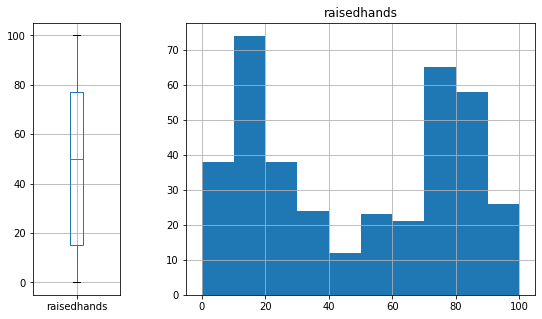

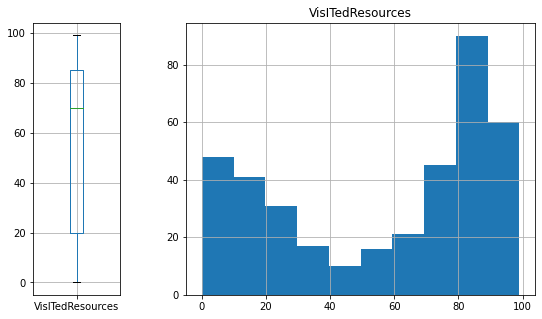

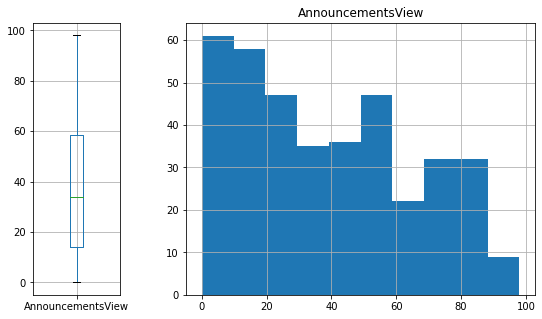

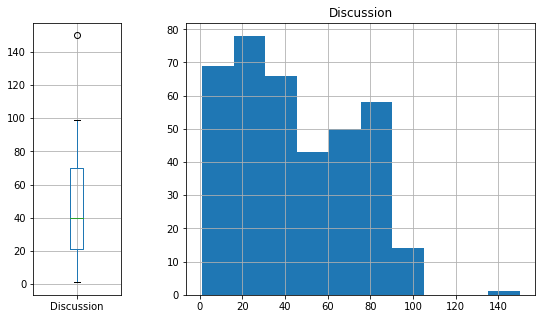

In [38]:
total_num_cols = len(train_numeric.columns)
for col in train_numeric.columns:
    fig, axes= plt.subplots(1,2, gridspec_kw={'width_ratios': [1, 4]}, figsize=(9,5))
    train.boxplot(column=col,ax=axes[0]);
    train.hist(column=col, ax=axes[1]);

#### Why 1.5 IQR only
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Boxplot_vs_PDF.svg/1024px-Boxplot_vs_PDF.svg.png" alt="nice_image_from_wikipedia" width="450"/>

https://math.stackexchange.com/questions/966331/why-john-tukey-set-1-5-iqr-to-detect-outliers-instead-of-1-or-2

In [39]:
Q1 = train['Discussion'].quantile(0.25)
Q3 = train['Discussion'].quantile(0.75)
IQR = Q3 - Q1
Q1, Q3, IQR

(21.0, 70.0, 49.0)

In [40]:
small_outliers = train['Discussion'] < (Q1 - 1.5 * IQR)
big_outliers = train['Discussion'] > (Q3 + 1.5 * IQR)

sum(small_outliers), sum(big_outliers)

(0, 1)

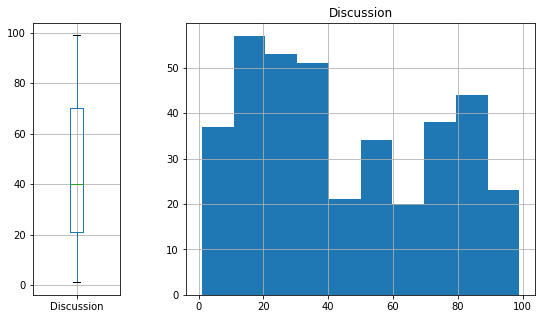

In [41]:
train = train[~(small_outliers | big_outliers)]
fig, axes= plt.subplots(1,2, gridspec_kw={'width_ratios': [1, 4]}, figsize=(9,5))
train.boxplot(column='Discussion',ax=axes[0]);
train.hist(column='Discussion', ax=axes[1]);

### Model Based 

### Final box plots

<AxesSubplot:>

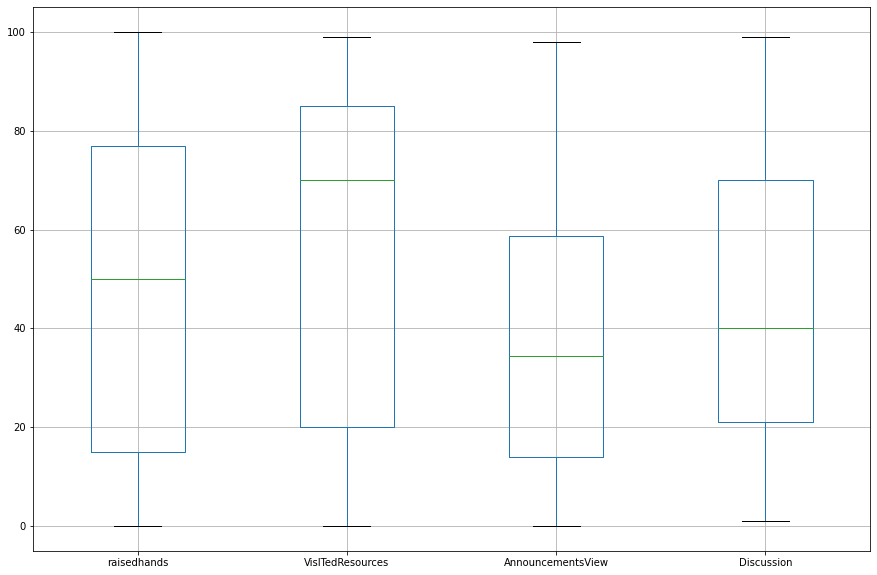

In [48]:
train[train_numeric.columns].boxplot(figsize=(15,10))

## 7 Feature Engineering

In [42]:
train

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
422,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Mum,70.0,69,46,45,Yes,Good,Above-7,M
25,M,KW,KuwaIT,MiddleSchool,G-07,A,IT,F,Father,8.0,7,30,40,Yes,Good,Above-7,L
53,F,KW,KuwaIT,HighSchool,G-11,A,Science,F,Mum,49.0,70,19,75,Yes,Good,Under-7,H
462,M,Iraq,Iraq,MiddleSchool,G-08,A,History,F,Father,72.0,87,72,89,Yes,Good,Above-7,M
101,F,KW,KuwaIT,lowerlevel,G-02,B,IT,F,Mum,70.0,92,50,7,Yes,Good,Under-7,H
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,M,Palestine,Jordan,MiddleSchool,G-07,B,Biology,F,Father,88.0,90,76,81,Yes,Good,Under-7,H
304,F,Jordan,Jordan,lowerlevel,G-04,B,Science,F,Father,15.0,50,24,43,Yes,Bad,Under-7,M
107,M,KW,KuwaIT,lowerlevel,G-02,B,IT,F,Father,70.0,90,41,33,Yes,Bad,Under-7,H
33,M,KW,KuwaIT,lowerlevel,G-05,A,English,F,Father,8.0,22,9,40,No,Bad,Above-7,L


#### Don't think we can make a new feature

## 9. Perform necessary transformation 
1. If the data is not normally distributed and highly skewed it is alwas better to transform the data in normal distribution as the most/all of the asumptions for deriving the methods are that they are normally distributed,
2. Although for classifications we don't have that assumpution (need to check)
3. https://anshikaaxena.medium.com/how-skewed-data-can-skrew-your-linear-regression-model-accuracy-and-transfromation-can-help-62c6d3fe4c53
 

array([[<AxesSubplot:title={'center':'raisedhands'}>,
        <AxesSubplot:title={'center':'VisITedResources'}>],
       [<AxesSubplot:title={'center':'AnnouncementsView'}>,
        <AxesSubplot:title={'center':'Discussion'}>]], dtype=object)

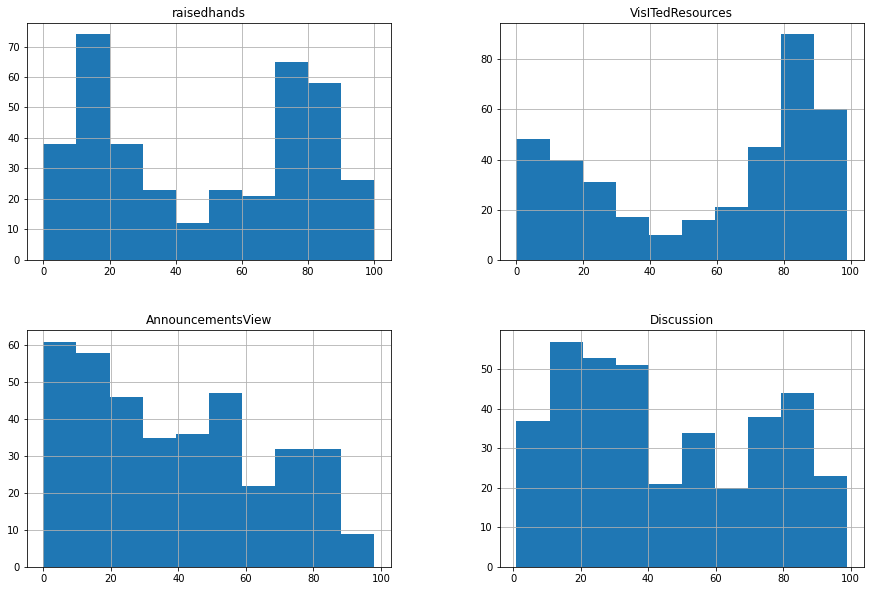

In [52]:
# check data distribution
train[train_numeric.columns].hist(figsize=(15,10))

#### No data seems skewed, We can move forward
1. to handle skewness
2. https://towardsdatascience.com/top-3-methods-for-handling-skewed-data-1334e0debf45

In [58]:
# if skewed apply transformations , log, sqrt, box-cot etc.
# train.AnnouncementsView.apply(np.log10)

## 10. Bining